<a href="https://colab.research.google.com/github/Sahanasd2003/AI-Powered-Task-Management-System/blob/main/AI_Powered_Task_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK 1 — Data Understanding & NLP Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

df = pd.read_csv("/content/archive (9).zip")
print("Dataset loaded successfully!")
print(df.info())
df.head()


Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20122 entries, 0 to 20121
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Task Description  20122 non-null  object
 1   Category          20122 non-null  object
 2   Skill             20122 non-null  object
dtypes: object(3)
memory usage: 471.7+ KB
None


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Task Description,Category,Skill
0,Implement user authentication,backend,spring boot
1,Optimize server performance,backend,asp.net
2,Manage database operations,backend,django
3,Implement user authentication,backend,api
4,Build a microservice,backend,kotlin


Step 2: Initial Exploration

After cleaning: 789 rows remain.


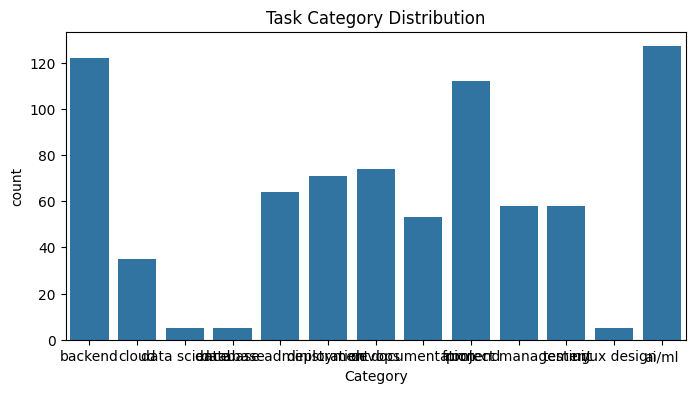

In [2]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(f"After cleaning: {df.shape[0]} rows remain.")

plt.figure(figsize=(8,4))
sns.countplot(x='Category', data=df)
plt.title("Task Category Distribution")
plt.show()


Step 3: Text Cleaning and Pre-processing

In [3]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_description'] = df['Task Description'].apply(clean_text)

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [stemmer.stem(w) for w in tokens]
    return ' '.join(tokens)

df['processed_description'] = df['clean_description'].apply(preprocess_text)
df[['Task Description','processed_description']].head()


,Task Description,processed_description
0,Implement user authentication,implement user authent
1,Optimize server performance,optim server perform
2,Manage database operations,manag databas oper
3,Implement user authentication,implement user authent
4,Build a microservice,build microservic


Step 4: Save the Clean Dataset

In [4]:
df.to_csv("/content/cleaned_task_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


WEEK 2 — Feature Extraction & Model Building

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("/content/cleaned_task_dataset.csv")



Step 1: Split data

In [10]:
X = df['processed_description']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)


Step 2: TF-IDF Vectorization


In [11]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)
print("TF-IDF features created.")


TF-IDF features created.


Step 3: Train Models

In [12]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Naive Bayes Accuracy: 0.9177215189873418
SVM Accuracy: 0.9556962025316456
                         precision    recall  f1-score   support

                  ai/ml       0.89      1.00      0.94        25
                backend       0.96      1.00      0.98        24
                  cloud       1.00      0.86      0.92         7
           data science       0.00      0.00      0.00         1
               database       0.00      0.00      0.00         1
database administration       0.93      1.00      0.96        13
             deployment       1.00      0.93      0.96        14
                 devops       1.00      1.00      1.00        15
          documentation       1.00      1.00      1.00        11
               frontend       1.00      0.91      0.95        22
     project management       1.00      1.00      1.00        12
                testing       0.92      1.00      0.96        12
           ui/ux design       0.00      0.00      0.00         1

              

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Step 4: Confusion Matrix

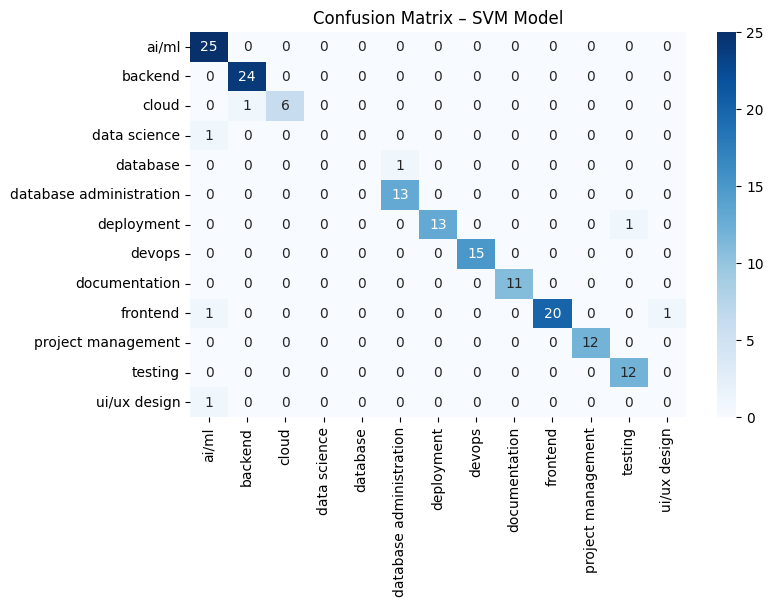

In [13]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)
plt.title("Confusion Matrix – SVM Model")
plt.show()


Step 5: Save Models

In [14]:
import pickle
with open('/content/tfidf_vectorizer.pkl','wb') as f: pickle.dump(vectorizer,f)
with open('/content/naive_bayes_model.pkl','wb') as f: pickle.dump(nb_model,f)
with open('/content/svm_model.pkl','wb') as f: pickle.dump(svm_model,f)
print("Models saved successfully.")


Models saved successfully.


WEEK 3 — Model Optimization & Preparation

In [15]:
from sklearn.model_selection import cross_val_score, GridSearchCV

X_all_tfidf = vectorizer.transform(df['processed_description'])
y_all = df['Category']
nb_cv = cross_val_score(nb_model, X_all_tfidf, y_all, cv=5)
svm_cv = cross_val_score(svm_model, X_all_tfidf, y_all, cv=5)

print("Naive Bayes mean accuracy:", np.mean(nb_cv))
print("SVM mean accuracy:", np.mean(svm_cv))


Naive Bayes mean accuracy: 0.916278319761348
SVM mean accuracy: 0.9504555349512215


Step 2: Hyperparameter Tuning (SVM)

In [16]:
param_grid = {'C':[0.1,1,5,10]}
grid_svm = GridSearchCV(LinearSVC(), param_grid, cv=3, scoring='accuracy', verbose=1)
grid_svm.fit(X_all_tfidf, y_all)
best_svm = grid_svm.best_estimator_
print("Best Parameters:", grid_svm.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'C': 1}


Step 3: Visual Comparison

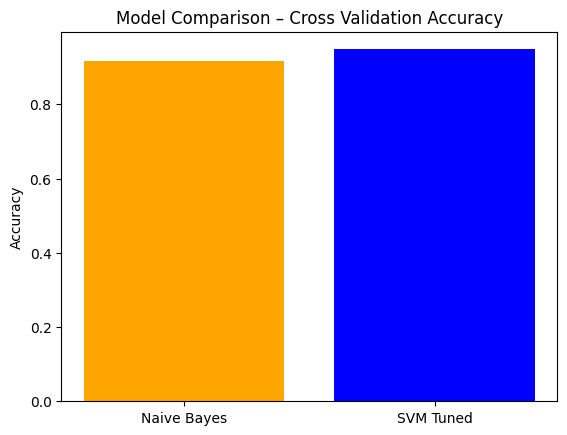

In [17]:
plt.bar(['Naive Bayes','SVM Tuned'], [np.mean(nb_cv), grid_svm.best_score_], color=['orange','blue'])
plt.title("Model Comparison – Cross Validation Accuracy")
plt.ylabel("Accuracy")
plt.show()


Step 4: Prediction Function

In [18]:
def predict_task_category(task_text):
    text = ''.join([c for c in task_text.lower() if c.isalnum() or c.isspace()])
    text_tfidf = vectorizer.transform([text])
    return best_svm.predict(text_tfidf)[0]

print("Example Prediction:", predict_task_category("Build a Django API"))


Example Prediction: backend


Step 5: Save Tuned Model

In [19]:
with open('/content/svm_model_tuned.pkl','wb') as f:
    pickle.dump(best_svm,f)
print("Tuned SVM model saved successfully.")


Tuned SVM model saved successfully.


WEEK 4 — Final Evaluation & Deployment

In [20]:
import re, seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

with open('/content/tfidf_vectorizer.pkl','rb') as f: vectorizer=pickle.load(f)
with open('/content/svm_model_tuned.pkl','rb') as f: svm_model=pickle.load(f)
df = pd.read_csv("/content/cleaned_task_dataset.csv")

from sklearn.model_selection import train_test_split
X=df['processed_description']; y=df['Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_test_tfidf=vectorizer.transform(X_test)
y_pred=svm_model.predict(X_test_tfidf)
print("Final Accuracy:", round(accuracy_score(y_test,y_pred),4))
print(classification_report(y_test,y_pred))


Final Accuracy: 0.9937
                         precision    recall  f1-score   support

                  ai/ml       1.00      1.00      1.00        25
                backend       1.00      1.00      1.00        24
                  cloud       1.00      1.00      1.00         7
           data science       1.00      1.00      1.00         1
               database       0.00      0.00      0.00         1
database administration       0.93      1.00      0.96        13
             deployment       1.00      1.00      1.00        14
                 devops       1.00      1.00      1.00        15
          documentation       1.00      1.00      1.00        11
               frontend       1.00      1.00      1.00        22
     project management       1.00      1.00      1.00        12
                testing       1.00      1.00      1.00        12
           ui/ux design       1.00      1.00      1.00         1

               accuracy                           0.99       158


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Step 2: Confusion Matrix & Category Distribution

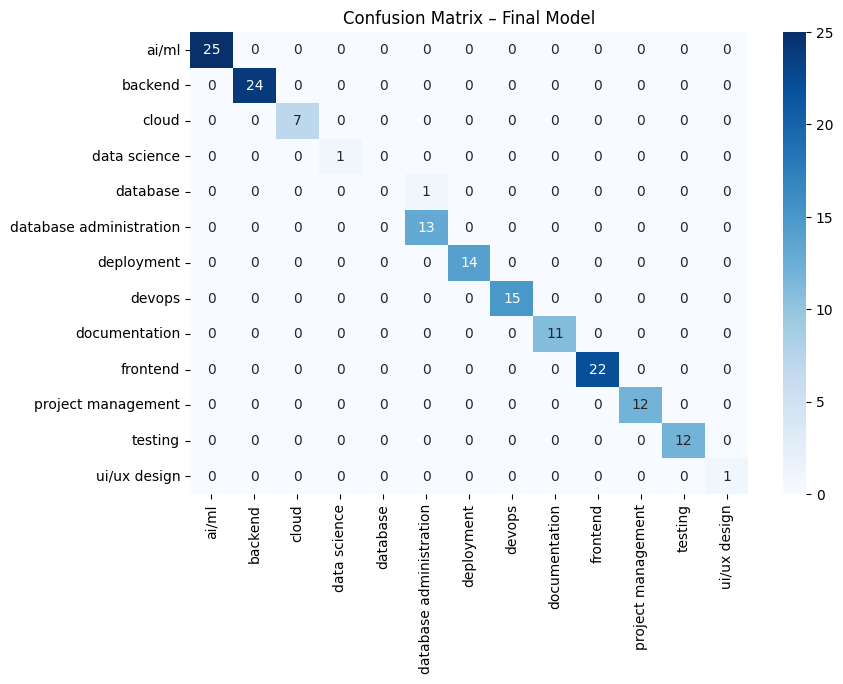

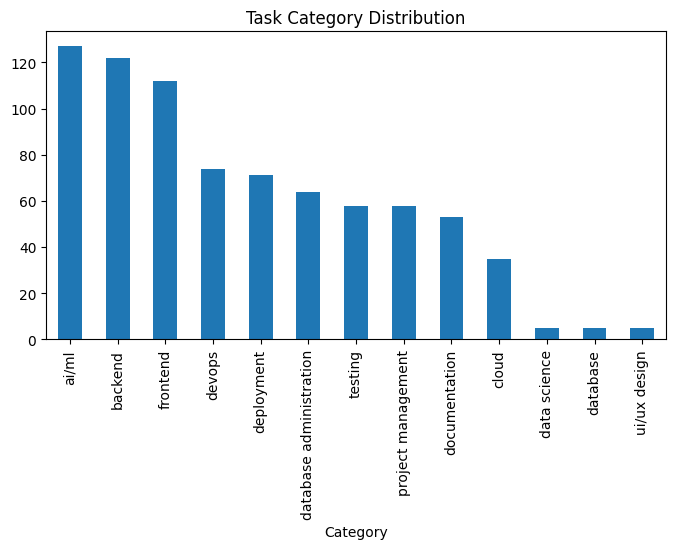

In [21]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=svm_model.classes_,yticklabels=svm_model.classes_)
plt.title("Confusion Matrix – Final Model")
plt.show()

plt.figure(figsize=(8,4))
df['Category'].value_counts().plot(kind='bar')
plt.title("Task Category Distribution")
plt.show()


Step 3: Streamlit App

In [22]:
app_code = """
import streamlit as st, pickle, re
with open('tfidf_vectorizer.pkl','rb') as f: vectorizer=pickle.load(f)
with open('svm_model_tuned.pkl','rb') as f: model=pickle.load(f)
def clean_text(t): t=t.lower(); t=re.sub(r'[^a-z\\s]','',t); return re.sub(r'\\s+',' ',t).strip()
st.title('🧠 AI-Powered Task Category Predictor')
text = st.text_area('Enter task description:', height=150)
if st.button('Predict'):
    if text.strip()=='':
        st.warning('Please enter a description!')
    else:
        pred = model.predict(vectorizer.transform([clean_text(text)]))[0]
        st.success(f'Predicted Category: {pred}')
        st.balloons()
st.markdown('---')
st.caption('Developed for Week 4 – Data Science & ML Project')
"""
with open("app.py","w") as f: f.write(app_code)
print("Streamlit app (app.py) created successfully.")


Streamlit app (app.py) created successfully.


In [24]:
!pip install streamlit -q
!streamlit run app.py & npx localtunnel --port 8501


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.7 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏

⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.36.208:8501

⠋your url is: https://social-clubs-care.loca.lt
  Stopping...
^C
